In [1]:
import sys
import gym
import numpy as np
from collections import defaultdict
from plot_utils import plot_blackjack_values, plot_policy

In [2]:
env = gym.make('Blackjack-v0')

# Control

In [3]:
def get_probs(Q_s, epsilon, nA):
    """ obtains the action probabilities corresponding to epsilon-greedy policy """
    policy_s = np.ones(nA) * epsilon / nA
    best_a = np.argmax(Q_s)
    policy_s[best_a] = 1 - epsilon + (epsilon / nA)
    return policy_s

In [4]:
def best_policy(Q,nA):
    return dict((k,np.argmax(v)) for k, v in Q.items())

In [5]:
def update_Q(env, episode, Q, alpha, gamma):
    
    for s, a, r in episode:
        first_occurence_idx = next(i for i,x in enumerate(episode) if x[0] == s)
        G = sum([x[2]*(gamma**i) for i,x in enumerate(episode[first_occurence_idx:])])
        Q[s][a] = Q[s][a] + alpha*(G - Q[s][a])
    
    return Q

In [6]:
def play_game(env, Q, epsilon, nA):
    """ generates an episode from following the epsilon-greedy policy """
    episode = []
    state = env.reset()
    while True:
        action = np.random.choice(np.arange(nA), p=get_probs(Q[state], epsilon, nA)) \
                                    if state in Q else env.action_space.sample()
        next_state, reward, done, info = env.step(action)
        episode.append((state, action, reward))
        state = next_state
        if done:
            break
    return episode

In [9]:
def mc_control(env, num_episodes):
    epsilon = 1.0
    eps_min = 0.01
    decay = 0.9999
    alpha = 0.001
    gamma = 1.0
    
    nA = env.action_space.n
    # initialize empty dictionary of arrays
    Q = defaultdict(lambda: np.zeros(nA))
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        
        #update epsilon
        epislon = max(epsilon*decay, eps_min)
        episode = play_game(env, Q, epsilon, nA)
        Q = update_Q(env, episode, Q, alpha, gamma)
    
    policy = best_policy(Q, nA)
    return policy, Q

Episode 500000/500000.

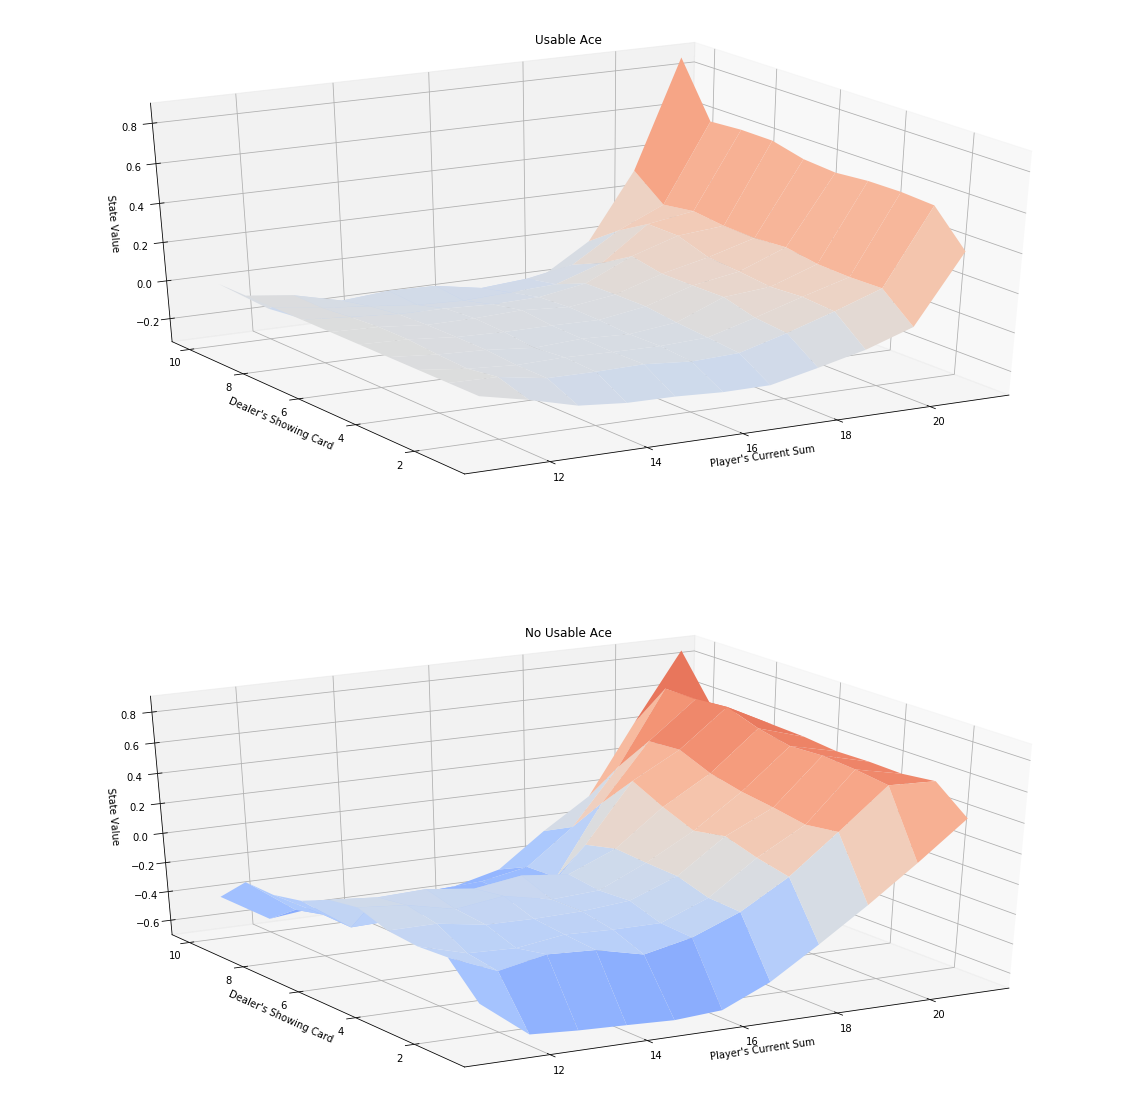

In [10]:
policy, Q = mc_control(env, 500000)

V = dict((k,np.max(v)) for k, v in Q.items())

# plot the state-value function
plot_blackjack_values(V)